# Examine an event catalog and visualize representation of events from selected networks

In [1]:
import os
import sys
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.width', 240)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
matplotlib.rcParams['figure.max_open_warning'] = 100

In [3]:
# Progress bar helper to indicate that slow tasks have not stalled
from tqdm.auto import tqdm

In [7]:
import requests

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
PICKS_PATH = r"C:\data_cache\Picks\20190219\ensemble.p.txt"
#PICKS_PATH = r"C:\data_cache\Picks\20190219\ensemble_small.p.txt"
dtype = {'#eventID': object,
    'originTimestamp': np.float64,
    'mag':                    np.float64,
    'originLon':              np.float64,
    'originLat':              np.float64,
    'originDepthKm':          np.float64,
    'net':                     object,
    'sta':                     object,
    'cha':                     object,
    'pickTimestamp':          np.float64,
    'phase':                   object,
    'stationLon':             np.float64,
    'stationLat':             np.float64,
    'az':                     np.float64,
    'baz':                    np.float64,
    'distance':               np.float64,
    'ttResidual':             np.float64,
    'snr':                    np.float64,
    'qualityMeasureCWT':      np.float64,
    'domFreq':                np.float64,
    'qualityMeasureSlope':    np.float64,
    'bandIndex':              np.int64,
    'nSigma':                 np.int64}

In [6]:
df_raw_picks = pd.read_csv(PICKS_PATH, ' ', header=0, dtype=dtype)
len(df_raw_picks)

5602653

In [36]:
# Query time period for source dataset
import obspy

start_time = obspy.UTCDateTime(df_raw_picks['originTimestamp'].min())
end_time = obspy.UTCDateTime(df_raw_picks['originTimestamp'].max())
print((str(start_time), str(end_time)))

('1993-01-02T04:05:03.344000Z', '2018-05-22T05:58:46.550000Z')


In [33]:
# Filter to just AU networks. The permanent AU station list here is based on FDSN web site http://www.fdsn.org/networks/detail/AU/
AU_NET = 'AU'
AU_NET_FILE = r"C:\data_cache\Picks\20190219\irisws-fedcatalog_2019-03-05T01 27 47Z.txt"
au_net_df = pd.read_csv(AU_NET_FILE, header=0, sep='|')
au_net_df.columns = [c.strip() for c in au_net_df.columns.tolist()]
AU_PERM_STATIONS = au_net_df['Station'].unique()
len(AU_PERM_STATIONS)

162

In [40]:
# Count matching by station code even if the network code doesn't match, since some AU stations could appear under II or IR.
# We're mainly interested in stations with low record count.
record_count = {}
df = df_raw_picks
for sta in AU_PERM_STATIONS:
    count = np.sum(df['sta'] == sta)
    record_count[sta] = count

In [41]:
record_count

{'ARMA': 17327,
 'ARPS': 13189,
 'AS01': 5897,
 'AS02': 615,
 'AS03': 1130,
 'AS04': 665,
 'AS05': 638,
 'AS06': 7876,
 'AS07': 7834,
 'AS08': 7838,
 'AS09': 642,
 'AS10': 630,
 'AS11': 3470,
 'AS12': 735,
 'AS13': 644,
 'AS14': 7757,
 'AS15': 647,
 'AS16': 628,
 'AS17': 677,
 'AS18': 17,
 'AS19': 640,
 'AS31': 8126,
 'AXCOZ': 0,
 'BBOO': 11886,
 'BLDU': 9340,
 'BN1H': 0,
 'BN2S': 0,
 'BOXOZ': 0,
 'BRAT': 33,
 'BW1H': 0,
 'BW2S': 0,
 'CARL': 0,
 'CATI': 0,
 'CMSA': 13179,
 'CN1H': 0,
 'CN2S': 0,
 'CNB': 14950,
 'COEN': 13099,
 'CORO': 3052,
 'CTA': 19783,
 'DLN': 0,
 'DNDOZ': 0,
 'DPH': 0,
 'DRS': 36,
 'EIDS': 14207,
 'FITZ': 26587,
 'FORT': 19225,
 'GC1S': 0,
 'GC2F': 0,
 'GD1S': 0,
 'GEES': 1451,
 'GEXS': 0,
 'GHSS': 0,
 'GIRL': 10366,
 'GLAD': 22,
 'GVL': 2137,
 'HTT': 6237,
 'INKA': 0,
 'KAKA': 11612,
 'KDU': 5844,
 'KELC': 0,
 'KLBR': 16385,
 'KMBL': 11227,
 'KNA': 8230,
 'KNRA': 5862,
 'LAROZ': 0,
 'LCRK': 0,
 'LHI': 5770,
 'MABG': 0,
 'MANU': 2881,
 'MAW': 16267,
 'MBWA': 16337,

In [57]:
np.sum([int(v == 0) for k, v in record_count.items()])

44

In [62]:
df_count = pd.DataFrame({'sta': [k for k, v in record_count.items()], 'count': [v for k, v in record_count.items()]}, columns=['sta', 'count'])

In [63]:
df_count

,sta,count
0,ARMA,17327
1,ARPS,13189
2,AS01,5897
3,AS02,615
4,AS03,1130
5,AS04,665
6,AS05,638
7,AS06,7876
8,AS07,7834
9,AS08,7838


In [68]:
df_count = df_count.sort_values('count')

In [78]:
# df_count

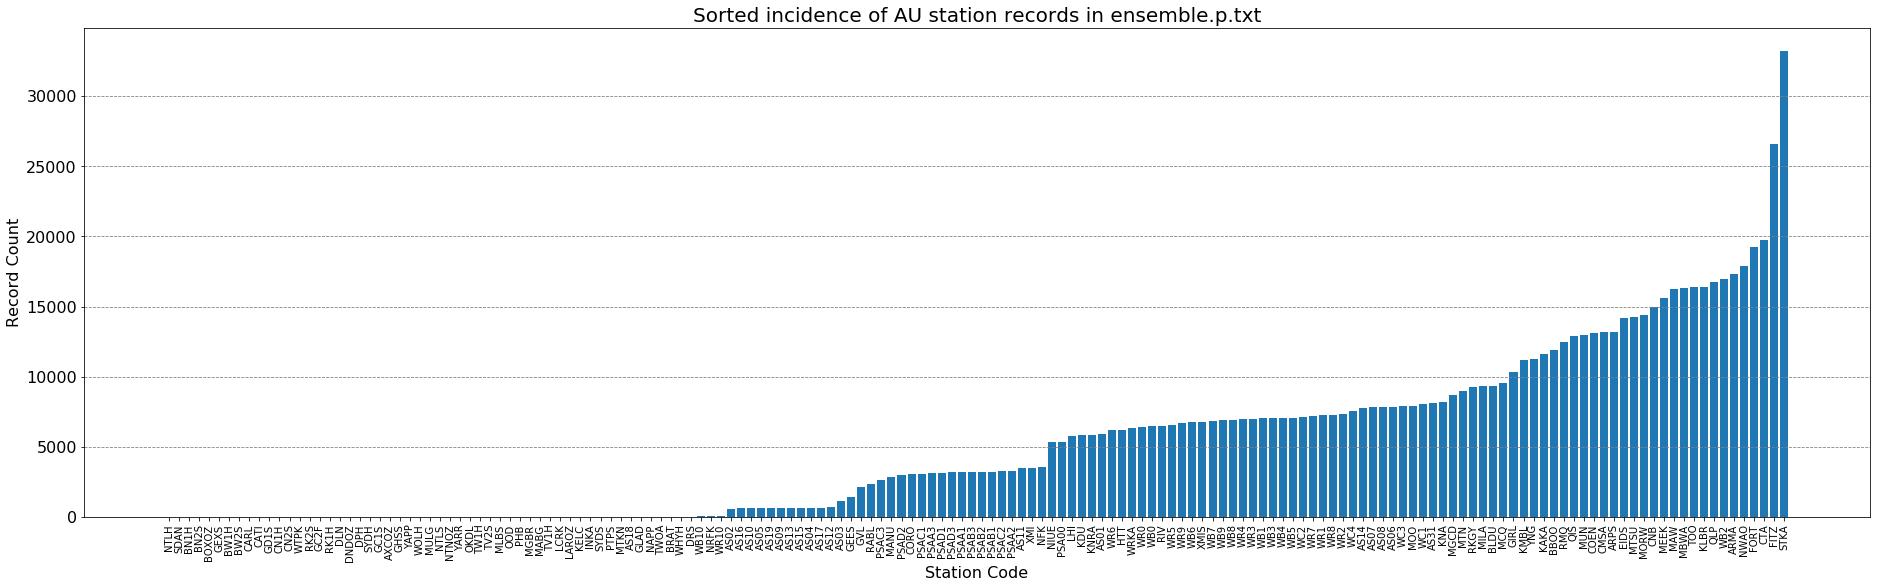

In [86]:
plt.figure(figsize=(32,9))
plt.bar(df_count['sta'], df_count['count'])
plt.yticks(fontsize=16)
plt.xticks(rotation=90)
plt.xlabel("Station Code", fontsize=16)
plt.ylabel("Record Count", fontsize=16)
plt.title("Sorted incidence of AU station records in ensemble.p.txt", fontsize=20)
plt.gca().yaxis.grid(color="#80808080", linestyle="--")
plt.savefig('AU_station_incidence_pwave_event_ensemble.png', dpi=200)